<a href="https://colab.research.google.com/github/Srabontideb/Machine_Learning-model_Implementations/blob/main/Unsupervised_learning_on_irish_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
df = pd.DataFrame(iris_data.data)
df.columns = iris_data.feature_names
df.head()
#for unsupervised learning we aren't adding target code

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.shape

(150, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


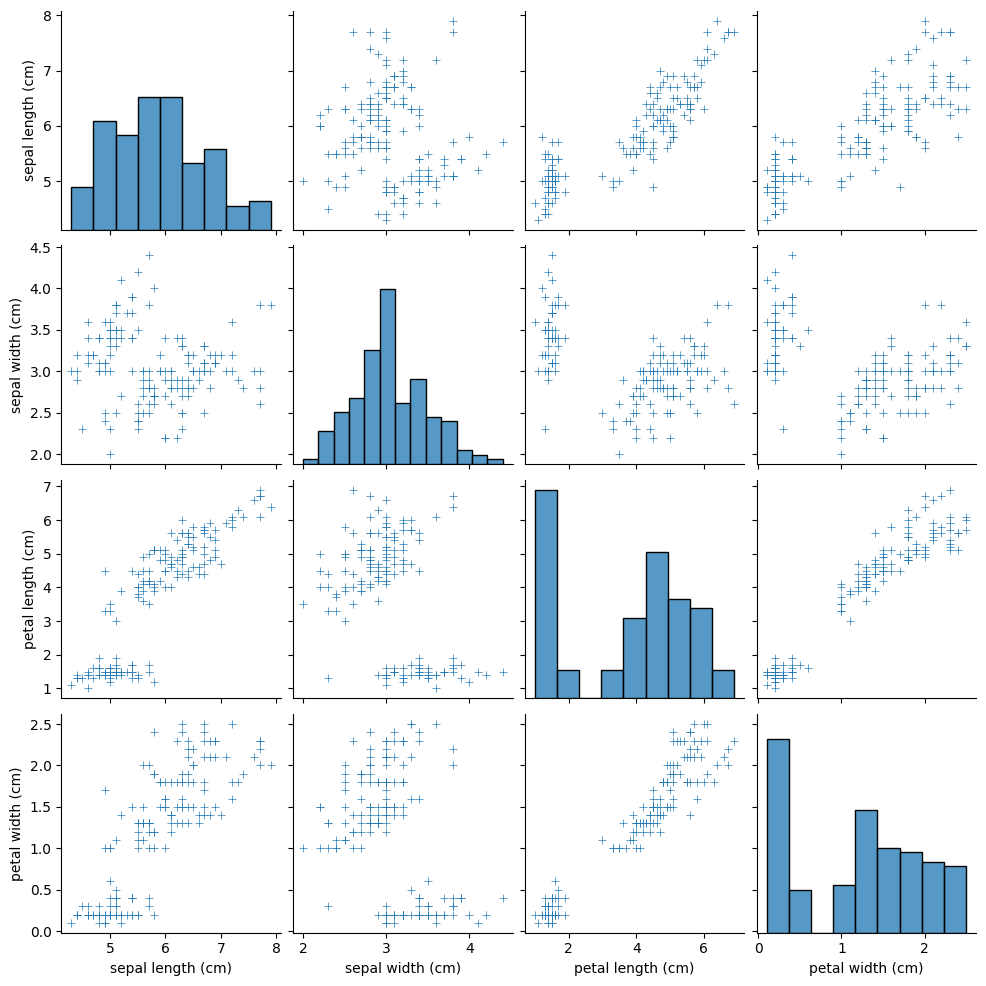

In [ ]:
sns.pairplot(df, markers='+')
plt.show()

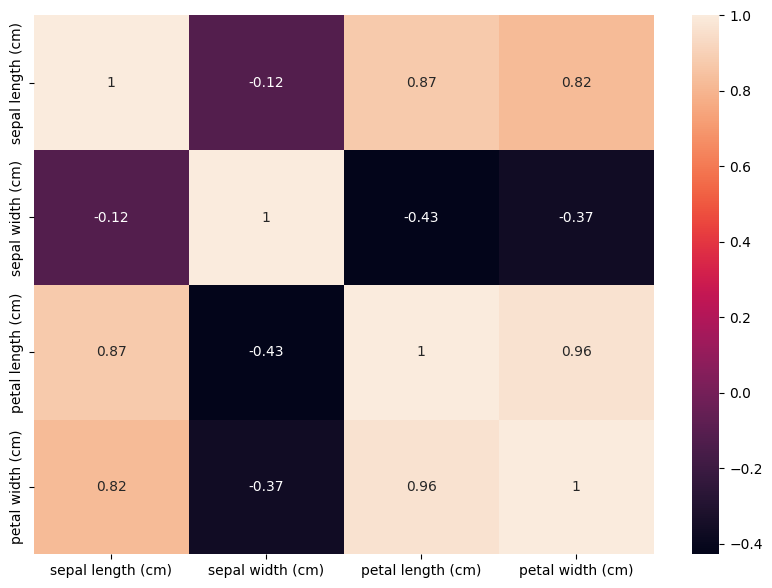

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

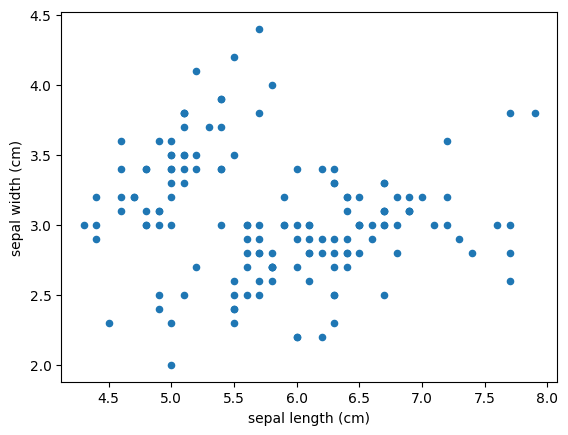

In [ ]:
df.plot(kind='scatter', x="sepal length (cm)", y="sepal width (cm)")
plt.show()

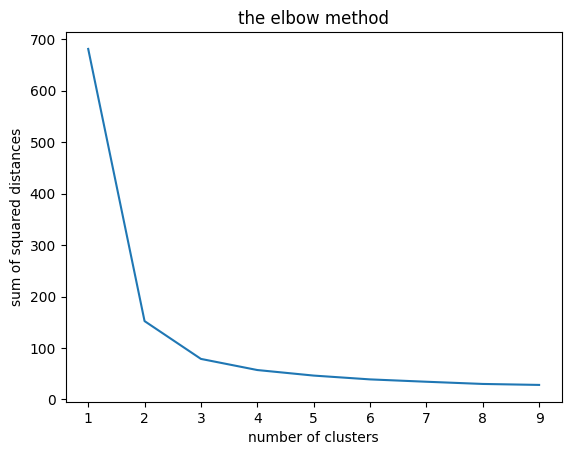

In [ ]:
wss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init="k-means++" , random_state = 42)
  kmeans.fit(df)
  wss.append(kmeans.inertia_)

plt.plot(range(1,10),wss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distances')
plt.show()

In [ ]:
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(df)
  score = silhouette_score(df, kmeans.labels_)
  print("for cluster: (), the silhouette score is:{}".format(i,score))

for cluster: (), the silhouette score is:2
for cluster: (), the silhouette score is:3
for cluster: (), the silhouette score is:4
for cluster: (), the silhouette score is:5
for cluster: (), the silhouette score is:6
for cluster: (), the silhouette score is:7
for cluster: (), the silhouette score is:8
for cluster: (), the silhouette score is:9


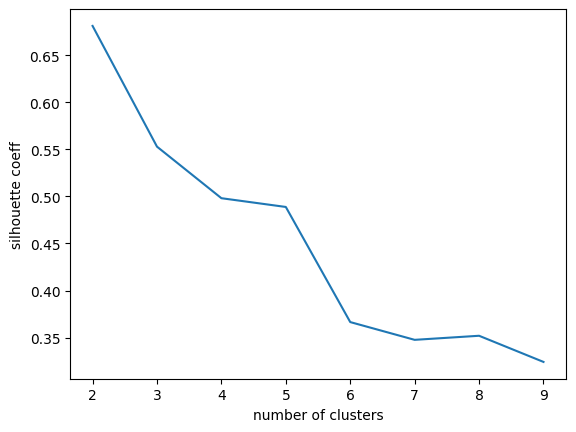

In [ ]:
silouette_coeff = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  score = silhouette_score(df, kmeans.labels_)
  silouette_coeff.append(score)

plt.plot(range(2,10),silouette_coeff)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("silhouette coeff")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [ ]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(X)
unique_labels = np.unique(y)

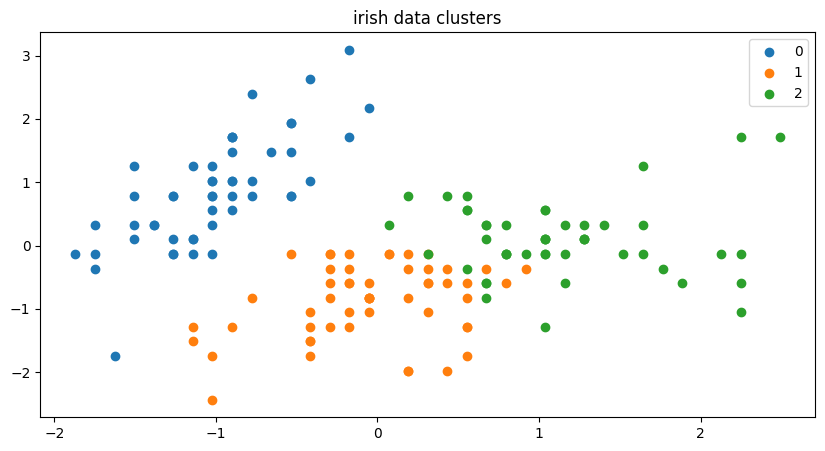

In [ ]:
plt.figure(figsize=(10,5))
for i in unique_labels:
  plt.scatter(X[y==i, 0], x[y==i, 1], label=i)
plt.title("irish data clusters")
plt.legend()
plt.show()